In [ ]:
# Install seaborn if needed
!pip install seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [ ]:
# Load the uploaded CSV file
file_path = "/content/vehicle_emissions.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,engine_size,fuel_type,co2_emissions,emission_category
0,1.887889,petrol,215.413794,B
1,1.924299,electric,234.463942,C
2,3.687571,diesel,180.042027,A
3,1.078842,petrol,156.704264,A
4,1.416434,diesel,269.166344,A


In [6]:
# Drop rows with missing values just to be safe
df = df.dropna()

# Use valid columns as features
X = df[['engine_size', 'fuel_type', 'co2_emissions']]
y = df['emission_category']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# Convert string values in 'fuel_type' to numeric codes
df['fuel_type'] = df['fuel_type'].astype('category').cat.codes

# Redefine features and labels using the updated dataframe
X = df[['engine_size', 'fuel_type', 'co2_emissions']]
y = df['emission_category']

# Split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


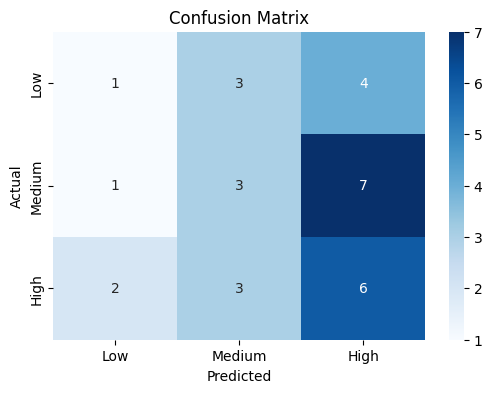

In [11]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define label names if categories are numeric (0 = Low, 1 = Medium, 2 = High)
label_names = ['Low', 'Medium', 'High']

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [12]:
# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.33
Precision: 0.31
Recall: 0.31
